In [44]:
import os
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from PIL import Image
from pycocotools.coco import COCO

In [2]:
annotation_file = "annotation.json"
image_folder = "images"

In [3]:
coco=COCO(annotation_file)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [4]:
cats = coco.loadCats(coco.getCatIds())
cats

[{'id': 0, 'name': 'bus'},
 {'id': 1, 'name': 'cat'},
 {'id': 2, 'name': 'pizza'}]

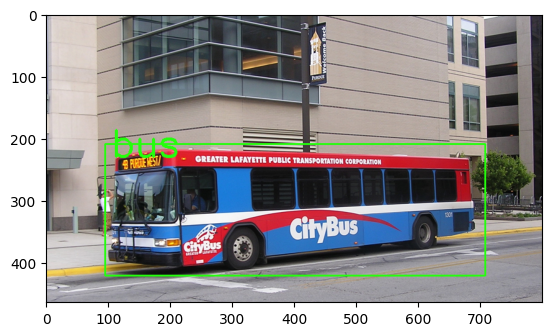

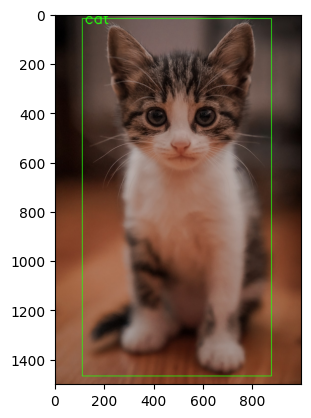

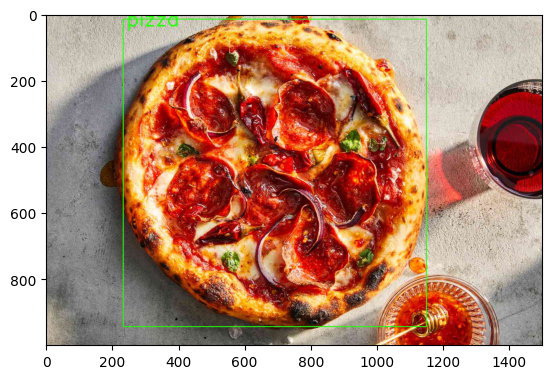

In [56]:
# cat_list = ['bus','cat','pizza']
for cat in cats:
    # category
    catId = cat["id"]
    catName = cat["name"]
    
    # images
    imgIds = coco.getImgIds(catIds=catId)
    imgs = coco.loadImgs(imgIds[0])
    img_path = imgs[0]["file_name"]
    img = Image.open(img_path)
    
    # annotations
    annIds = coco.getAnnIds(imgIds = imgIds, catIds = catId, iscrowd = False)
    anns = coco.loadAnns(annIds)
    bbox = anns[0]["bbox"]
    img = np.uint8(img).copy()
    x1, y1, w, h = bbox
    
    # label with cv2
    img = cv.rectangle(img, (int(x1), int(y1)), (int(x1+w), int(y1+h)), (36,255,12), 2)
    img = cv.putText(img, catName, (int(x1+10), int(y1+20)), cv.FONT_HERSHEY_SIMPLEX, 2, (36,255,12),4)

    plt.figure()
    plt.imshow(img)